In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib as mpl
import numpy as np


In [18]:
filename = './epl2020.csv'
data_epl = pd.read_csv(filename)

data_epl.columns

Index(['Unnamed: 0', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'teamId', 'ppda_cal', 'allowed_ppda',
       'matchtime', 'tot_points', 'round', 'tot_goal', 'tot_con', 'Referee.x',
       'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x',
       'AF.x', 'AC.x', 'AY.x', 'AR.x', 'B365H.x', 'B365D.x', 'B365A.x',
       'HtrgPerc', 'AtrgPerc', 'matchDay'],
      dtype='object')

In [19]:
# Distinct team names to avoid repetition

teams = data_epl.teamId.unique()

### Actual and Expected Points for Each Unique Team

In [20]:
# Create dictionary
actual_pts = {}
expected_pts = {}
for team in teams:
  actual_pts[team] = data_epl[data_epl['teamId'] == team].pts.sum()
  expected_pts[team] = data_epl[data_epl['teamId'] == team].xpts.sum()

In [21]:
# Separate teams that underachieved from team that overachieved

pts_difference = {team: actual_pts[team] - expected_pts[team] for team in teams}
sorted_teams = sorted(pts_difference.keys(), key=pts_difference.get)

In [46]:
# Plot parameters
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['axes.facecolor'] = '#ededed'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.major.pad'] = 10

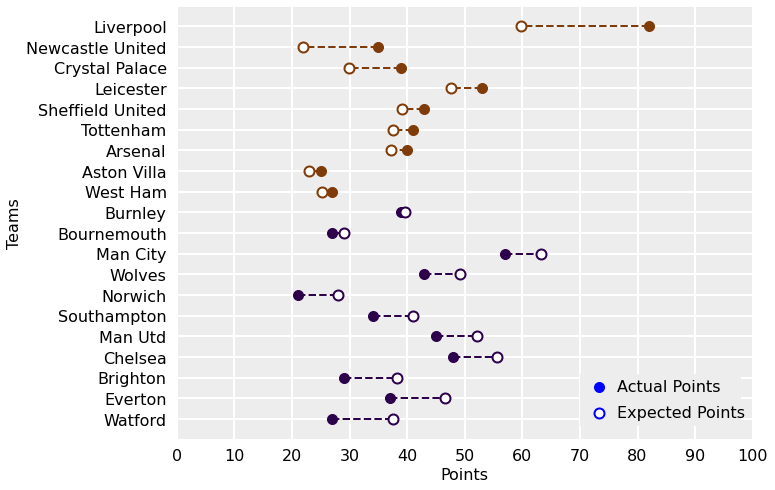

In [31]:
# Creating figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0, 0, 1, 1])

colors = plt.get_cmap('PuOr', 2)

# Data points with dashed line
yval = 0
for team in sorted_teams:
    if actual_pts[team] > expected_pts[team]:
        fill_color = colors(0)
    else:
        fill_color = colors(1)

    ax.plot([actual_pts[team], expected_pts[team]], [yval, yval], linestyle='--', linewidth=2, color=fill_color)
    ax.plot(actual_pts[team], yval, 'o', color=fill_color, markersize=10)
    ax.plot(expected_pts[team], yval, 'o', color='white', markeredgecolor=fill_color, markeredgewidth=2, markersize=10)
    yval += 1


ax.grid(color='white', linewidth=2)
# Points labels
ax.set_xticks(np.arange(0, 110, 10))
# Team labels
ax.set_yticks(np.arange(0, len(sorted_teams), 1))
ax.set_yticklabels(sorted_teams)
# Axis limits
ax.set_xlim(0, 100)
# Axis labels
ax.set_xlabel('Points')
ax.set_ylabel('Teams')

# Legend
leg = fig.add_axes([0.7, 0.03, 0.28, 0.12])
leg.plot([0], [1], 'o', color='blue', markersize=10)
leg.text(0.3, 1, 'Actual Points', ha='left', va='center')
leg.plot([0], [0], 'o', color='white', markeredgecolor='blue', markeredgewidth=2, markersize=10)
leg.text(0.3, 0, 'Expected Points', ha='left', va='center')
leg.set_xticks([])
leg.set_yticks([])
leg.set_xlim(-0.3, 2.3)
leg.set_ylim(-0.5, 1.5)

plt.show()

#### Team Colors

In [43]:
team_colors = {'Arsenal':'#ef0107', 'Aston Villa':'#95bfe5', 'Bournemouth':'#da291c', 'Brighton':'#0057b8',
               'Burnley':'#6c1d45', 'Chelsea':'#034694', 'Crystal Palace':'#1b458f', 'Everton':'#003399',
               'Leicester':'#003090', 'Liverpool':'#c8102e', 'Man City':'#6cabdd', 'Man Utd':'#da291c',
               'Newcastle United':'#241f20', 'Norwich':'#fff200', 'Sheffield United':'#ee2737', 
               'Southampton':'#d71920', 'Tottenham':'#132257', 'Watford':'#fbee23', 'West Ham':'#7a263a',
               'Wolves':'#fdb913'}

#### Color Swatches

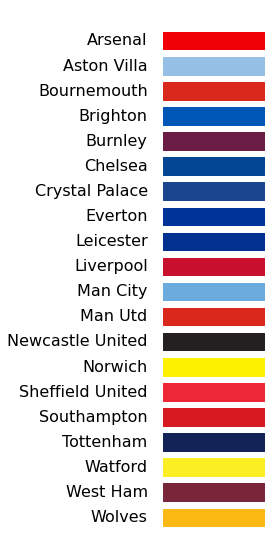

In [44]:
# Figure
fig = plt.figure(figsize=(2,10))
ax = fig.add_subplot(111, facecolor='white')

# Plot color swatches
y_val = 0
for team in sorted(teams, reverse=True):
    ax.fill_between([0, 1], y_val + 0.1, y_val + 0.8, color=team_colors[team])
    y_val += 1

# Remove x-ticks
ax.set_xticks([])

# Set y-ticks to team names
ax.set_yticks(np.arange(0.5, 20, 1))
ax.set_yticklabels(sorted(teams, reverse=True))

plt.show()

### Top 15 Goalscorers and Assisters

In [34]:
# Load data
filename_players = './players_1920_fin.csv'
data_pl = pd.read_csv(filename_players)

data_pl.columns

Index(['Unnamed: 0', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'full', 'team', 'ppm'],
      dtype='object')

In [35]:
# Unique player names

players = data_pl.full.unique()

In [36]:
# Retrieve goals and assists stats

player_assists = {}
player_goals = {}
for player in players:
    mins = data_pl[data_pl['full'] == player].minutes.sum()/90.
    if mins >= 10:
        player_assists[player] = data_pl[data_pl['full'] == player].assists.sum()/mins
        player_goals[player] = data_pl[data_pl['full'] == player].goals_scored.sum()/mins

In [38]:
top_players_goals = sorted(player_goals.keys(), key=player_goals.get, reverse=True)[:15]
top_players_assists = sorted(player_assists.keys(), key=player_assists.get, reverse=True)[:15]

In [39]:
# Player name format update

updated_names = {}
for player in players:
    split_name = player.split(' ')
    updated_names[player] = split_name[0][0] + '. ' + split_name[-1]

# Update specific player names
updated_names['Sergio Ag?ero'] = 'S. Agüero'
updated_names['Sadio Man?'] = 'S. Mané'
updated_names['Ra?l Jim?nez'] = 'R. Jiménez'
updated_names['Nicolas P?p?'] = 'N. Pépé'
updated_names['Emiliano Buend?a'] = 'E. Buendía'
updated_names['Adama Traor?'] = 'A. Traoré'
updated_names['Pascal Gro?'] = 'P. Groß'
updated_names['Rui Pedro dos Santos Patr?cio'] = 'R. Patrício'

#### Plot of top 20 assisters

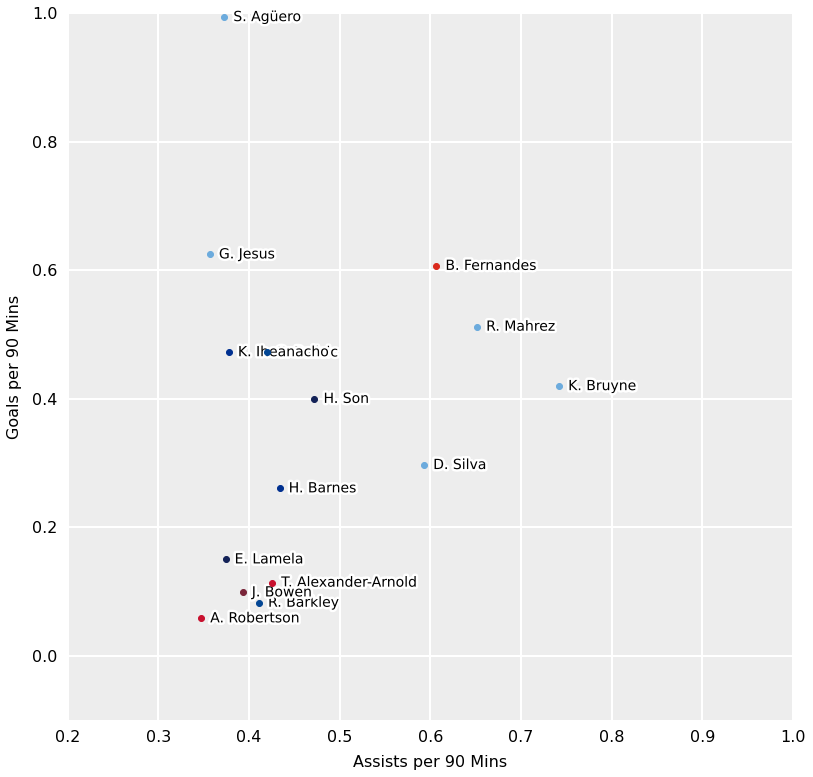

In [51]:
# Figure
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

# Plot player data
for player in top_players_assists:
    team = data_pl[data_pl['full'] == player].team.iloc[0]
    ax.plot(player_assists[player], player_goals[player], 'o', color=team_colors[team], zorder=3)
    text = ax.text(player_assists[player] + 0.01, player_goals[player], updated_names[player], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])

# Grid
ax.grid(color='white', linewidth=2)

# Axis labels
ax.set_xlabel('Assists per 90 Mins', labelpad=10)
ax.set_ylabel('Goals per 90 Mins', labelpad=10)

# Axis limits
ax.set_xlim(0.2, 1)
ax.set_ylim(-0.1, 1)

plt.show()

#### Plot of top 15 goalscorers

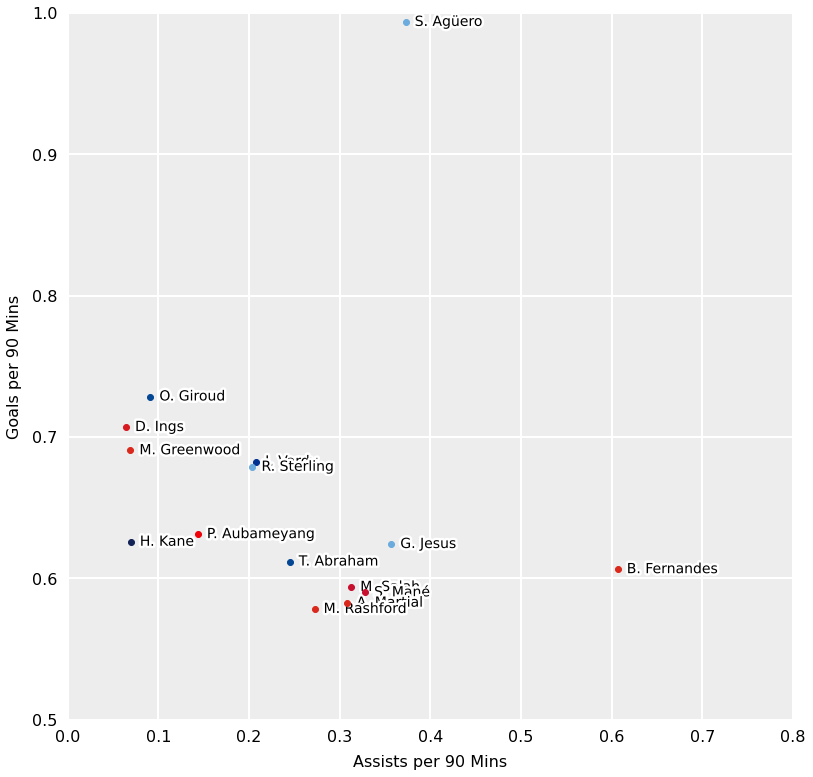

In [49]:
# Creating Figure
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

# Plot player data
for player in top_players_goals:
    team = data_pl[data_pl['full'] == player].team.iloc[0]
    ax.plot(player_assists[player], player_goals[player], 'o', color=team_colors[team], zorder=3)
    text = ax.text(player_assists[player] + 0.01, player_goals[player], updated_names[player], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])

# Grid
ax.grid(color='white', linewidth=2)

# Axis labels
ax.set_xlabel('Assists per 90 Mins', labelpad=10)
ax.set_ylabel('Goals per 90 Mins', labelpad=10)

# Axis limits
ax.set_xlim(0, 0.8)
ax.set_ylim(0.5, 1)

plt.show()

### Clean Sheets and Goalkeeper Saves

In [52]:
gk_saves = {}
gk_cleansheets = {}
for player in players:
    mins = data_pl[data_pl['full'] == player].minutes.sum()/90.
    if mins >= 10:
        gk_saves[player] = data_pl[data_pl['full'] == player].saves.sum()/mins
        gk_cleansheets[player] = data_pl[data_pl['full'] == player].clean_sheets.sum()

In [55]:
top_gks_saves = sorted(gk_saves.keys(), key=gk_saves.get, reverse=True)[:20]

In [54]:
top_gks_saves

['Hugo Lloris',
 'Bernd Leno',
 'Martin Dubravka',
 'Tim Krul',
 'Aaron Ramsdale',
 'Tom Heaton',
 'Paulo Gazzaniga',
 'Vicente Guaita',
 'Nick Pope',
 'Ben Foster',
 'Mathew Ryan',
 'Lukasz Fabianski',
 'Angus Gunn',
 'Alex McCarthy',
 'Jos? Reina',
 'Dean Henderson',
 'Kasper Schmeichel',
 'David de Gea',
 'Jordan Pickford',
 'Rui Pedro dos Santos Patr?cio',
 'Alisson Ramses Becker',
 'Ederson Santana de Moraes']

### Plot of Clean Sheets and GK Saves 

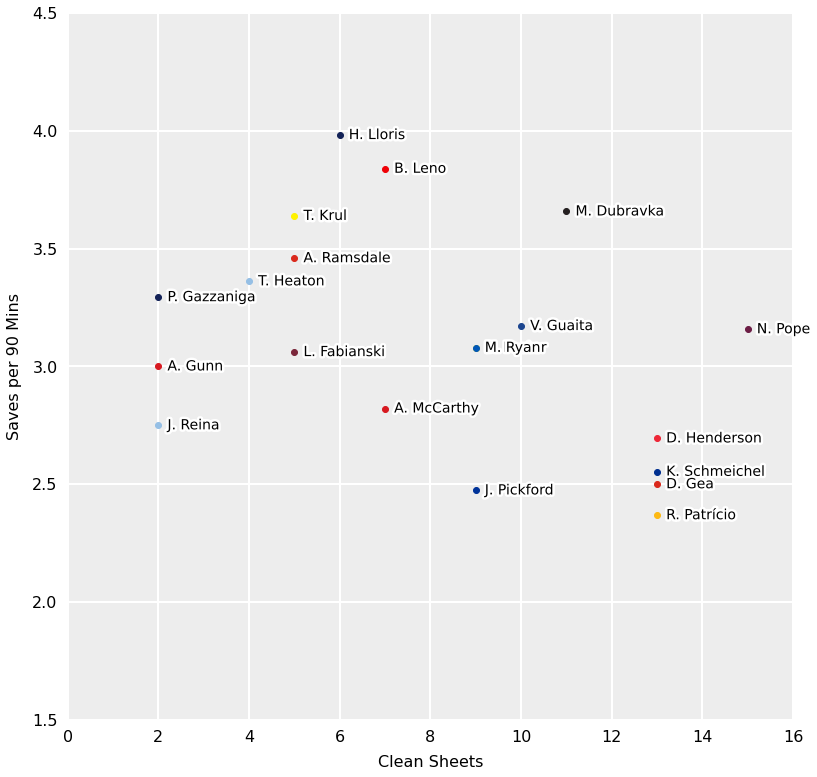

In [59]:
# Figure
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111)

# GK data
for gk in top_gks_saves:
    team = data_pl[data_pl['full'] == gk].team.iloc[0]
    ax.plot(gk_cleansheets[gk], gk_saves[gk], 'o', color=team_colors[team], zorder=3)
    text = ax.text(gk_cleansheets[gk] + 0.2, gk_saves[gk], updated_names[gk], size=14, va='center', ha='left', zorder=2)
    text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])

# Grid
ax.grid(color='white', linewidth=2)

# Axis label
ax.set_xlabel('Clean Sheets', labelpad=10)
ax.set_ylabel('Saves per 90 Mins', labelpad=10)

# Axis limits
ax.set_xlim(0, 16)
ax.set_ylim(1.5, 4.5)

plt.show()